In [20]:
import yfinance as yf
import pandas as pd
import numpy as np

In [21]:
pip install --force-reinstall numpy==1.20.3

  Using cached numpy-1.20.3-cp38-cp38-win_amd64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.20.3 which is incompatible.
tensorflow-intel 2.13.0 requires tensorboard<2.14,>=2.13, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.13.0 requires tensorflow-estimator<2.14,>=2.13.0, but you have tensorflow-estimator 2.10.0 which is incompatible.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
pyportfolioopt 1.5.5 requires numpy<2.0.0,>=1.22.4, but you have numpy 1.20.3 which is incompatible.


In [22]:
print(numpy.__version__)

1.20.3


In [23]:
# Download Apple stock data from yfinance
Apple = yf.download("AAPL", start = '2010-01-01', end = '2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [24]:
#Include S&P 500, Apple and Coca Cola into a list named ticker
ticker = ["SPY", "AAPL", "KO"]

In [25]:
#Download the data in the ticker from yfinance
stocks = yf.download(ticker, start = '2010-01-01', end = '2021-01-01')

[*********************100%***********************]  3 of 3 completed


In [26]:
#Show first 5 rows of data
stocks.head()

Adj Close                           Close                         \
                AAPL         KO        SPY      AAPL         KO         SPY   
Date                                                                          
2010-01-04  6.470742  18.351231  86.860069  7.643214  28.520000  113.330002   
2010-01-05  6.481928  18.129244  87.090004  7.656429  28.174999  113.629997   
2010-01-06  6.378825  18.122812  87.151314  7.534643  28.165001  113.709999   
2010-01-07  6.367031  18.077770  87.519203  7.520714  28.094999  114.190002   
2010-01-08  6.409363  17.743170  87.810455  7.570714  27.575001  114.570000   

                High                              Low                         \
                AAPL         KO         SPY      AAPL         KO         SPY   
Date                                                                           
2010-01-04  7.660714  28.610001  113.389999  7.585000  28.450001  111.510002   
2010-01-05  7.699643  28.495001  113.680000  7.616071  28.070000  112.849998   
2010-01-06  7.686786  28.219999  113.989998  7.526786  27.990000  113.430000   
2010-01-07  7.571429  28.184999  114.330002  7.466071  27.875000  113.180000   
2010-01-08  7.571429  27.820000  114.620003  7.466429  27.375000  113.660004   

                Open                            Volume                       
                AAPL         KO         SPY       AAPL        KO        SPY  
Date                                                                         
2010-01-04  7.622500  28.580000  112.370003  493729600  13870400  118944600  
2010-01-05  7.664286  28.424999  113.260002  601904800  23172400  111579900  
2010-01-06  7.656429  28.174999  113.519997  552160000  19264600  116074400  
2010-01-07  7.562500  28.165001  113.500000  477131200  13234600  131091100  
2010-01-08  7.510714  27.730000  113.889999  447610800  28712400  126402800

In [27]:
# Show last 5 rows of data
stocks.tail()

Adj Close                              Close             \
                  AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2020-12-24  129.514450  48.392036  351.874756  131.970001  53.439999   
2020-12-28  134.146652  49.044025  354.897614  136.690002  54.160000   
2020-12-29  132.360519  49.016857  354.220581  134.869995  54.130001   
2020-12-30  131.231903  49.297577  354.725922  133.720001  54.439999   
2020-12-31  130.221054  49.659790  356.528198  132.690002  54.840000   

                              High                                Low  \
                   SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2020-12-24  369.000000  133.460007  53.549999  369.029999  131.100006   
2020-12-28  372.170013  137.339996  54.439999  372.589996  133.509995   
2020-12-29  371.459991  138.789993  54.490002  374.000000  134.339996   
2020-12-30  371.989990  135.990005  54.630001  373.100006  133.399994   
2020-12-31  373.880005  134.740005  54.930000  374.660004  131.720001   

                                         Open                         \
                   KO         SPY        AAPL         KO         SPY   
Date                                                                   
2020-12-24  53.020000  367.450012  131.320007  53.020000  368.079987   
2020-12-28  53.730000  371.070007  133.990005  53.849998  371.739990   
2020-12-29  54.020000  370.829987  138.050003  54.450001  373.809998   
2020-12-30  54.029999  371.570007  135.580002  54.049999  372.339996   
2020-12-31  54.270000  371.230011  134.080002  54.450001  371.779999   

               Volume                     
                 AAPL       KO       SPY  
Date                                      
2020-12-24   54930100  3265500  26457900  
2020-12-28  124486200  9020500  39000400  
2020-12-29  121047300  8320600  53680500  
2020-12-30   96452100  8142700  49455300  
2020-12-31   99116600  8495000  78520700

In [28]:
# Show the columns and datatypes from the Pandas library
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2010-01-04 to 2020-12-31
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2769 non-null   float64
 1   (Adj Close, KO)    2769 non-null   float64
 2   (Adj Close, SPY)   2769 non-null   float64
 3   (Close, AAPL)      2769 non-null   float64
 4   (Close, KO)        2769 non-null   float64
 5   (Close, SPY)       2769 non-null   float64
 6   (High, AAPL)       2769 non-null   float64
 7   (High, KO)         2769 non-null   float64
 8   (High, SPY)        2769 non-null   float64
 9   (Low, AAPL)        2769 non-null   float64
 10  (Low, KO)          2769 non-null   float64
 11  (Low, SPY)         2769 non-null   float64
 12  (Open, AAPL)       2769 non-null   float64
 13  (Open, KO)         2769 non-null   float64
 14  (Open, SPY)        2769 non-null   float64
 15  (Volume, AAPL)     2769 non-null   int64  
 16  (Volum

In [29]:
# Save the data as an Excel file in a CSV format
stocks.to_csv("stocks.csv")

In [30]:
# Read the data from the CSV file named stocks
stocks = pd.read_csv("stocks.csv")
stocks

,Unnamed: 0,Adj Close,Adj Close.1,Adj Close.2,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
0,NaN,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,6.4707417488098145,18.35123062133789,86.86006927490234,7.643214225769043,28.520000457763672,113.33000183105469,7.660714149475098,28.610000610351562,113.38999938964844,7.585000038146973,28.450000762939453,111.51000213623047,7.622499942779541,28.579999923706055,112.37000274658203,493729600,13870400,118944600
3,2010-01-05,6.481927871704102,18.129243850708008,87.09000396728516,7.656428813934326,28.174999237060547,113.62999725341797,7.699643135070801,28.4950008392334,113.68000030517578,7.6160712242126465,28.06999969482422,112.8499984741211,7.664286136627197,28.424999237060547,113.26000213623047,601904800,23172400,111579900
4,2010-01-06,6.378824710845947,18.122812271118164,87.15131378173828,7.534643173217773,28.165000915527344,113.70999908447266,7.68678617477417,28.219999313354492,113.98999786376953,7.526785850524902,27.989999771118164,113.43000030517578,7.656428813934326,28.174999237060547,113.5199966430664,552160000,19264600,116074400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,2020-12-24,129.5144500732422,48.39203643798828,351.874755859375,131.97000122070312,53.439998626708984,369.0,133.4600067138672,53.54999923706055,369.0299987792969,131.10000610351562,53.02000045776367,367.45001220703125,131.32000732421875,53.02000045776367,368.0799865722656,54930100,3265500,26457900
2767,2020-12-28,134.1466522216797,49.04402542114258,354.8976135253906,136.69000244140625,54.15999984741211,372.1700134277344,137.33999633789062,54.439998626708984,372.5899963378906,133.50999450683594,53.72999954223633,371.07000732421875,133.99000549316406,53.849998474121094,371.739990234375,124486200,9020500,39000400
2768,2020-12-29,132.3605194091797,49.0168571472168,354.2205810546875,134.8699951171875,54.130001068115234,371.4599914550781,138.7899932861328,54.4900016784668,374.0,134.33999633789062,54.02000045776367,370.8299865722656,138.0500030517578,54.45000076293945,373.80999755859375,121047300,8320600,53680500
2769,2020-12-30,131.23190307617188,49.297576904296875,354.7259216308594,133.72000122070312,54.439998626708984,371.989990234375,135.99000549316406,54.630001068115234,373.1000061035156,133.39999389648438,54.029998779296875,371.57000732421875,135.5800018310547,54.04999923706055,372.3399963378906,96452100,8142700,49455300


In [32]:
# Reset the dates from showing the row numbers and adjust the columns in a standardized way
stocks = pd.read_csv("stocks.csv", header = [0, 1], index_col = [0], parse_dates = [0])
stocks

Adj Close                              Close             \
                  AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2010-01-04    6.470742  18.351231   86.860069    7.643214  28.520000   
2010-01-05    6.481928  18.129244   87.090004    7.656429  28.174999   
2010-01-06    6.378825  18.122812   87.151314    7.534643  28.165001   
2010-01-07    6.367031  18.077770   87.519203    7.520714  28.094999   
2010-01-08    6.409363  17.743170   87.810455    7.570714  27.575001   
...                ...        ...         ...         ...        ...   
2020-12-24  129.514450  48.392036  351.874756  131.970001  53.439999   
2020-12-28  134.146652  49.044025  354.897614  136.690002  54.160000   
2020-12-29  132.360519  49.016857  354.220581  134.869995  54.130001   
2020-12-30  131.231903  49.297577  354.725922  133.720001  54.439999   
2020-12-31  130.221054  49.659790  356.528198  132.690002  54.840000   

                              High                                Low  \
                   SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2010-01-04  113.330002    7.660714  28.610001  113.389999    7.585000   
2010-01-05  113.629997    7.699643  28.495001  113.680000    7.616071   
2010-01-06  113.709999    7.686786  28.219999  113.989998    7.526786   
2010-01-07  114.190002    7.571429  28.184999  114.330002    7.466071   
2010-01-08  114.570000    7.571429  27.820000  114.620003    7.466429   
...                ...         ...        ...         ...         ...   
2020-12-24  369.000000  133.460007  53.549999  369.029999  131.100006   
2020-12-28  372.170013  137.339996  54.439999  372.589996  133.509995   
2020-12-29  371.459991  138.789993  54.490002  374.000000  134.339996   
2020-12-30  371.989990  135.990005  54.630001  373.100006  133.399994   
2020-12-31  373.880005  134.740005  54.930000  374.660004  131.720001   

                                         Open                         \
                   KO         SPY        AAPL         KO         SPY   
Date                                                                   
2010-01-04  28.450001  111.510002    7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998    7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000    7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000    7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004    7.510714  27.730000  113.889999   
...               ...         ...         ...        ...         ...   
2020-12-24  53.020000  367.450012  131.320007  53.020000  368.079987   
2020-12-28  53.730000  371.070007  133.990005  53.849998  371.739990   
2020-12-29  54.020000  370.829987  138.050003  54.450001  373.809998   
2020-12-30  54.029999  371.570007  135.580002  54.049999  372.339996   
2020-12-31  54.270000  371.230011  134.080002  54.450001  371.779999   

               Volume                       
                 AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2020-12-24   54930100   3265500   26457900  
2020-12-28  124486200   9020500   39000400  
2020-12-29  121047300   8320600   53680500  
2020-12-30   96452100   8142700   49455300  
2020-12-31   99116600   8495000   78520700  

[2769 rows x 18 columns]

In [33]:
# Check out the columns by putting them as a MultiIndex
stocks.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',   'KO'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',   'KO'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',   'KO'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',   'KO'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',   'KO'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',   'KO'),
            (   'Volume',  'SPY')],
           )

In [34]:
# Convert MultiIndex to one tuple
stocks.columns = stocks.columns.to_flat_index()

In [35]:
# Check out the columns by putting them as a tuple
stocks.columns

Index([('Adj Close', 'AAPL'),   ('Adj Close', 'KO'),  ('Adj Close', 'SPY'),
           ('Close', 'AAPL'),       ('Close', 'KO'),      ('Close', 'SPY'),
            ('High', 'AAPL'),        ('High', 'KO'),       ('High', 'SPY'),
             ('Low', 'AAPL'),         ('Low', 'KO'),        ('Low', 'SPY'),
            ('Open', 'AAPL'),        ('Open', 'KO'),       ('Open', 'SPY'),
          ('Volume', 'AAPL'),      ('Volume', 'KO'),     ('Volume', 'SPY')],
      dtype='object')

In [42]:
# Provide basic statistics of the data for each column
stocks.describe()

,"(Adj Close, AAPL)","(Adj Close, KO)","(Adj Close, SPY)","(Close, AAPL)","(Close, KO)","(Close, SPY)","(High, AAPL)","(High, KO)","(High, SPY)","(Low, AAPL)","(Low, KO)","(Low, SPY)","(Open, AAPL)","(Open, KO)","(Open, SPY)","(Volume, AAPL)","(Volume, KO)","(Volume, SPY)"
count,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2.769000e+03,2.769000e+03,2.769000e+03
mean,31.522342,31.953174,181.488476,33.777537,41.320121,207.676797,34.114230,41.583236,208.716963,33.413543,41.042551,206.475522,33.764375,41.314411,207.648136,2.866162e+08,1.502133e+07,1.244573e+08
std,24.583424,8.118785,69.487675,24.572747,6.808527,67.240791,24.895185,6.864731,67.589965,24.220789,6.755616,66.883703,24.561595,6.807492,67.258092,2.289459e+08,6.716946e+06,7.477756e+07
min,5.806766,16.243891,79.026390,6.858929,25.014999,102.199997,7.000000,25.150000,103.419998,6.794643,24.735001,101.129997,6.870357,25.110001,103.110001,4.544800e+07,2.996300e+06,2.027000e+07
25%,15.181948,26.394419,114.525406,17.484285,37.660000,141.559998,17.695356,37.919998,142.100006,17.333929,37.419998,140.929993,17.518213,37.700001,141.660004,1.211120e+08,1.071810e+07,7.292670e+07
50%,24.517962,31.516815,175.435913,26.987499,41.759998,205.210007,27.225000,41.980000,206.190002,26.705000,41.529999,204.110001,26.975000,41.750000,204.960007,2.029972e+08,1.350830e+07,1.045961e+08
75%,40.879471,37.329926,241.183411,43.007500,45.549999,265.339996,43.367500,45.799999,267.320007,42.605000,45.310001,263.390015,43.012501,45.549999,265.779999,3.890376e+08,1.751480e+07,1.539926e+08
max,134.146652,52.648426,356.528198,136.690002,60.130001,373.880005,138.789993,60.130001,378.459991,134.339996,59.619999,371.570007,138.050003,59.810001,373.809998,1.880998e+09,9.896750e+07,7.178287e+08


In [61]:
# Convert back from one tuple to MultiIndex
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)
stocks

Adj Close                              Close             \
                  AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2010-01-04    6.470742  18.351231   86.860069    7.643214  28.520000   
2010-01-05    6.481928  18.129244   87.090004    7.656429  28.174999   
2010-01-06    6.378825  18.122812   87.151314    7.534643  28.165001   
2010-01-07    6.367031  18.077770   87.519203    7.520714  28.094999   
2010-01-08    6.409363  17.743170   87.810455    7.570714  27.575001   
...                ...        ...         ...         ...        ...   
2020-12-24  129.514450  48.392036  351.874756  131.970001  53.439999   
2020-12-28  134.146652  49.044025  354.897614  136.690002  54.160000   
2020-12-29  132.360519  49.016857  354.220581  134.869995  54.130001   
2020-12-30  131.231903  49.297577  354.725922  133.720001  54.439999   
2020-12-31  130.221054  49.659790  356.528198  132.690002  54.840000   

                              High                                Low  \
                   SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2010-01-04  113.330002    7.660714  28.610001  113.389999    7.585000   
2010-01-05  113.629997    7.699643  28.495001  113.680000    7.616071   
2010-01-06  113.709999    7.686786  28.219999  113.989998    7.526786   
2010-01-07  114.190002    7.571429  28.184999  114.330002    7.466071   
2010-01-08  114.570000    7.571429  27.820000  114.620003    7.466429   
...                ...         ...        ...         ...         ...   
2020-12-24  369.000000  133.460007  53.549999  369.029999  131.100006   
2020-12-28  372.170013  137.339996  54.439999  372.589996  133.509995   
2020-12-29  371.459991  138.789993  54.490002  374.000000  134.339996   
2020-12-30  371.989990  135.990005  54.630001  373.100006  133.399994   
2020-12-31  373.880005  134.740005  54.930000  374.660004  131.720001   

                                         Open                         \
                   KO         SPY        AAPL         KO         SPY   
Date                                                                   
2010-01-04  28.450001  111.510002    7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998    7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000    7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000    7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004    7.510714  27.730000  113.889999   
...               ...         ...         ...        ...         ...   
2020-12-24  53.020000  367.450012  131.320007  53.020000  368.079987   
2020-12-28  53.730000  371.070007  133.990005  53.849998  371.739990   
2020-12-29  54.020000  370.829987  138.050003  54.450001  373.809998   
2020-12-30  54.029999  371.570007  135.580002  54.049999  372.339996   
2020-12-31  54.270000  371.230011  134.080002  54.450001  371.779999   

               Volume                       
                 AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2020-12-24   54930100   3265500   26457900  
2020-12-28  124486200   9020500   39000400  
2020-12-29  121047300   8320600   53680500  
2020-12-30   96452100   8142700   49455300  
2020-12-31   99116600   8495000   78520700  

[2769 rows x 18 columns]

In [62]:
# Access a group of rows and columns by the label named "Close"
close = stocks.loc[:, "Close"]

In [65]:
close

,AAPL,KO,SPY
Date,,,
2010-01-04,7.643214,28.520000,113.330002
2010-01-05,7.656429,28.174999,113.629997
2010-01-06,7.534643,28.165001,113.709999
2010-01-07,7.520714,28.094999,114.190002
2010-01-08,7.570714,27.575001,114.570000
...,...,...,...
2020-12-24,131.970001,53.439999,369.000000
2020-12-28,136.690002,54.160000,372.170013
2020-12-29,134.869995,54.130001,371.459991


In [63]:
# Import Matplotlib and Seaborn to plot graphs
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<function matplotlib.pyplot.show(close=None, block=None)>

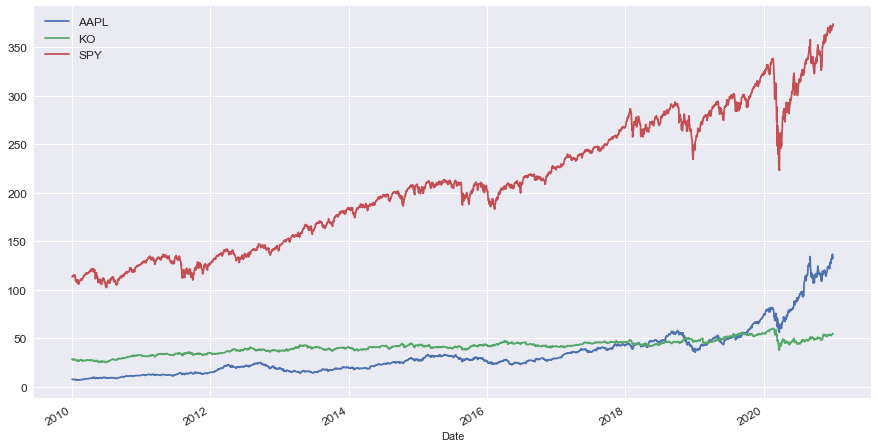

In [99]:
# Plot graphs by setting figure size and font size
close.plot(figsize = (15, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show

In [100]:
# Get the first value of Close price from AAPL
close.iloc[0, 0]

7.643214225769043

In [141]:
# Get the close prices from the first 5 and last 5 records
close.AAPL

Date
2010-01-04      7.643214
2010-01-05      7.656429
2010-01-06      7.534643
2010-01-07      7.520714
2010-01-08      7.570714
                 ...    
2020-12-24    131.970001
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
Name: AAPL, Length: 2769, dtype: float64

In [142]:
# Normalize the data through divding by the first value from AAPL
close.AAPL.div(close.iloc[0, 0])

Date
2010-01-04     1.000000
2010-01-05     1.001729
2010-01-06     0.985795
2010-01-07     0.983973
2010-01-08     0.990514
                ...    
2020-12-24    17.266296
2020-12-28    17.883838
2020-12-29    17.645717
2020-12-30    17.495258
2020-12-31    17.360498
Name: AAPL, Length: 2769, dtype: float64

In [143]:
# Normalize the data through divding by the first value from AAPL and multiplied by 100 for each value
close.AAPL.div(close.iloc[0, 0]).mul(100)

Date
2010-01-04     100.000000
2010-01-05     100.172893
2010-01-06      98.579511
2010-01-07      98.397266
2010-01-08      99.051443
                 ...     
2020-12-24    1726.629626
2020-12-28    1788.383766
2020-12-29    1764.571699
2020-12-30    1749.525753
2020-12-31    1736.049763
Name: AAPL, Length: 2769, dtype: float64

In [144]:
# Get the first close price of each stock
close.iloc[0]

AAPL      7.643214
KO       28.520000
SPY     113.330002
Name: 2010-01-04 00:00:00, dtype: float64

In [145]:
# Get floating points by deviding 100
close.div(close.iloc[0].mul(100))

,AAPL,KO,SPY
Date,,,
2010-01-04,0.010000,0.010000,0.010000
2010-01-05,0.010017,0.009879,0.010026
2010-01-06,0.009858,0.009876,0.010034
2010-01-07,0.009840,0.009851,0.010076
2010-01-08,0.009905,0.009669,0.010109
...,...,...,...
2020-12-24,0.172663,0.018738,0.032560
2020-12-28,0.178838,0.018990,0.032839
2020-12-29,0.176457,0.018980,0.032777


In [146]:
# Define normclose
normclose = close.div(close.iloc[0].mul(100))

<function matplotlib.pyplot.show(close=None, block=None)>

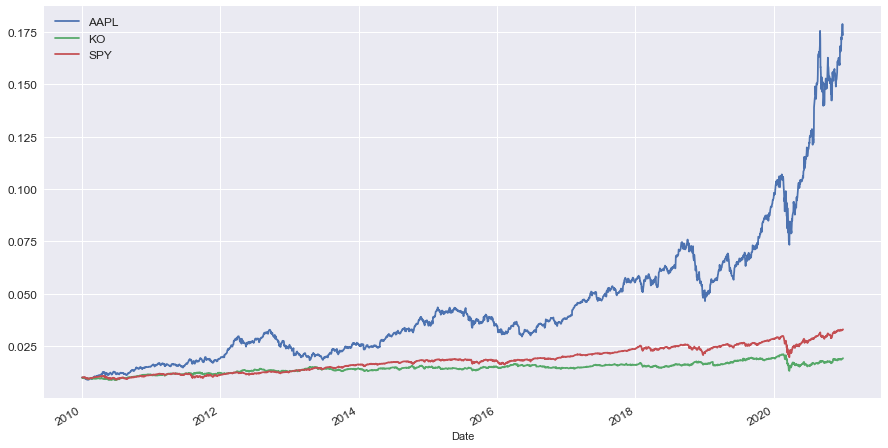

In [107]:
# Plot graphs with normclose
normclose.plot(figsize = (15, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show

In [149]:
# Copy and show all closing prices as a frame to the variable appl
aapl = close.AAPL.copy().to_frame()
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [150]:
# Shifting the previous data to the next
aapl.shift(periods = 1)

,AAPL
Date,
2010-01-04,NaN
2010-01-05,7.643214
2010-01-06,7.656429
2010-01-07,7.534643
2010-01-08,7.520714
...,...
2020-12-24,130.960007
2020-12-28,131.970001
2020-12-29,136.690002


In [151]:
# Add a column named "lag1" and shift the data to the next
aapl["lag1"] = aapl.shift(periods = 1)
aapl

,AAPL,lag1
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,7.643214
2010-01-06,7.534643,7.656429
2010-01-07,7.520714,7.534643
2010-01-08,7.570714,7.520714
...,...,...
2020-12-24,131.970001,130.960007
2020-12-28,136.690002,131.970001
2020-12-29,134.869995,136.690002


In [152]:
# Add a column named "Diff"  and calculate the % change between the earlier day and the later day
aapl["Diff"] = aapl.AAPL.sub(aapl.lag1).mul(100)
aapl["Diff"]

Date
2010-01-04           NaN
2010-01-05      1.321459
2010-01-06    -12.178564
2010-01-07     -1.392937
2010-01-08      5.000019
                 ...    
2020-12-24    100.999451
2020-12-28    472.000122
2020-12-29   -182.000732
2020-12-30   -114.999390
2020-12-31   -102.999878
Name: Diff, Length: 2769, dtype: float64

In [153]:
# Add a column named "% Change" with the calculation in % change
aapl["% Change"] = aapl.AAPL.div(aapl.lag1).sub(1).mul(100)
aapl

,AAPL,lag1,Diff,% Change
Date,,,,
2010-01-04,7.643214,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,1.321459,0.172893
2010-01-06,7.534643,7.656429,-12.178564,-1.590632
2010-01-07,7.520714,7.534643,-1.392937,-0.184871
2010-01-08,7.570714,7.520714,5.000019,0.664833
...,...,...,...,...
2020-12-24,131.970001,130.960007,100.999451,0.771224
2020-12-28,136.690002,131.970001,472.000122,3.576571
2020-12-29,134.869995,136.690002,-182.000732,-1.331485


In [154]:
# Add a column named "% Change" and shift the data to the next
aapl["Diff 2"] = aapl.AAPL.diff(periods = 1)
aapl

,AAPL,lag1,Diff,% Change,Diff 2
Date,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,1.321459,0.172893,0.013215
2010-01-06,7.534643,7.656429,-12.178564,-1.590632,-0.121786
2010-01-07,7.520714,7.534643,-1.392937,-0.184871,-0.013929
2010-01-08,7.570714,7.520714,5.000019,0.664833,0.050000
...,...,...,...,...,...
2020-12-24,131.970001,130.960007,100.999451,0.771224,1.009995
2020-12-28,136.690002,131.970001,472.000122,3.576571,4.720001
2020-12-29,134.869995,136.690002,-182.000732,-1.331485,-1.820007


In [155]:
# Add a column named "% Change 2" and shift the data to the next
aapl["% Change 2"] = aapl.AAPL.pct_change(periods = 1).mul(100)
aapl

,AAPL,lag1,Diff,% Change,Diff 2,% Change 2
Date,,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,1.321459,0.172893,0.013215,0.172893
2010-01-06,7.534643,7.656429,-12.178564,-1.590632,-0.121786,-1.590632
2010-01-07,7.520714,7.534643,-1.392937,-0.184871,-0.013929,-0.184871
2010-01-08,7.570714,7.520714,5.000019,0.664833,0.050000,0.664833
...,...,...,...,...,...,...
2020-12-24,131.970001,130.960007,100.999451,0.771224,1.009995,0.771224
2020-12-28,136.690002,131.970001,472.000122,3.576571,4.720001,3.576571
2020-12-29,134.869995,136.690002,-182.000732,-1.331485,-1.820007,-1.331485


In [162]:
# Drop the columns: "Diff 2", "lag1", "Diff" and "% Change"
del aapl["Diff 2"]
del aapl["lag1"]
del aapl["Diff"]
del aapl["% Change"]
aapl

,AAPL,% Change 2
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,0.172893
2010-01-06,7.534643,-1.590632
2010-01-07,7.520714,-0.184871
2010-01-08,7.570714,0.664833
...,...,...
2020-12-24,131.970001,0.771224
2020-12-28,136.690002,3.576571
2020-12-29,134.869995,-1.331485


In [163]:
# Rename column "% Change 2" to "Change"
aapl.rename(columns = {"% Change 2": "Change"}, inplace = True)
aapl

,AAPL,Change
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,0.172893
2010-01-06,7.534643,-1.590632
2010-01-07,7.520714,-0.184871
2010-01-08,7.570714,0.664833
...,...,...
2020-12-24,131.970001,0.771224
2020-12-28,136.690002,3.576571
2020-12-29,134.869995,-1.331485


In [165]:
# Resample the closing prices at the end of each month
aapl.AAPL.resample("M").last()

Date
2010-01-31      6.859286
2010-02-28      7.307857
2010-03-31      8.392857
2010-04-30      9.324643
2010-05-31      9.174286
                 ...    
2020-08-31    129.039993
2020-09-30    115.809998
2020-10-31    108.860001
2020-11-30    119.050003
2020-12-31    132.690002
Freq: M, Name: AAPL, Length: 132, dtype: float64

In [168]:
# Calculate the percentage change by resampling the closing prices at the last business day of each month
aapl.AAPL.resample("BM").last().pct_change(periods = 1).mul(100)

Date
2010-01-29          NaN
2010-02-26     6.539620
2010-03-31    14.847028
2010-04-30    11.102138
2010-05-31    -1.612472
                ...    
2020-08-31    21.437974
2020-09-30   -10.252632
2020-10-30    -6.001206
2020-11-30     9.360649
2020-12-31    11.457370
Freq: BM, Name: AAPL, Length: 132, dtype: float64

In [169]:
# Drop the "Change" column
del aapl["Change"]
aapl

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [217]:
# Remove N/A values for aapl with a calculation in  % change and save it as a variable named "ret" 
ret = aapl.pct_change().dropna()
ret

,AAPL
Date,
2010-01-05,0.001729
2010-01-06,-0.015906
2010-01-07,-0.001849
2010-01-08,0.006648
2010-01-11,-0.008821
...,...
2020-12-24,0.007712
2020-12-28,0.035766
2020-12-29,-0.013315


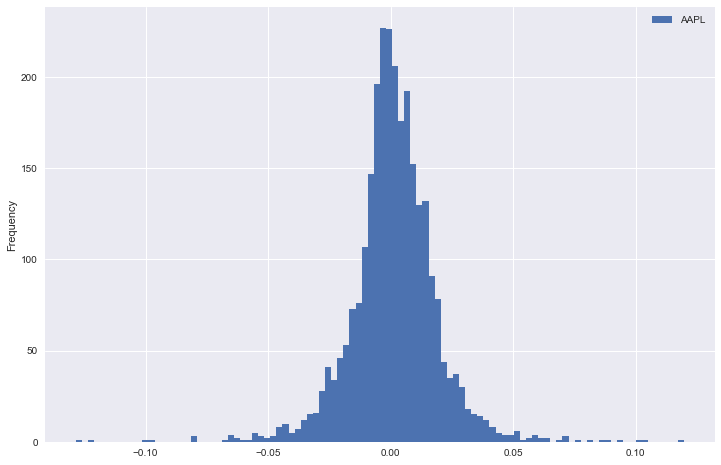

In [172]:
# Plot the ret graph as a histogram
ret.plot(kind = "hist", figsize = (12, 8), bins = 100)
plt.show()

In [178]:
# Calculate Apple's daily mean return
daily_mean_ret = ret.mean()
daily_mean_ret

AAPL    0.001191
dtype: float64

In [175]:
# Calculate its variance
var_daily = ret.var()
var_daily

AAPL    0.000318
dtype: float64

In [176]:
# Calculate its variance
std_daily = np.sqrt(var_daily)
std_daily

AAPL    0.017843
dtype: float64

In [184]:
# Calculate its standard deviation
ret.std()

AAPL    0.017843
dtype: float64

In [180]:
# Calculate its annual average
annual_mean_ret = daily_mean_ret * 252
annual_mean_ret

AAPL    0.300134
dtype: float64

In [182]:
# Calculate its annual return
annual_var_return = var_daily * 252
annual_var_return

AAPL    0.080226
dtype: float64

In [183]:
# Take its square root
annual_std_returns = np.sqrt(annual_var_return)
annual_std_returns

AAPL    0.283242
dtype: float64

In [185]:
# An alternative way to calculate the same amount of annual_std_returns
ret.std() * np.sqrt(252)

AAPL    0.283242
dtype: float64

In [218]:
# Allocate more stocks to the ticker
ticker = ["SPY", "AAPL", "KO", "IBM", "DIS", "MSFT"]

In [187]:
# Redownload the stocks prices from the ticker
stocks = yf.download(ticker, start = "2010-01-01", end = "2021-01-01")

[*********************100%***********************]  6 of 6 completed


In [230]:
# Access a group of rows and columns by the label named "Close"
close = stocks.loc[:, "Close"].copy()

In [231]:
# Define normclose
normclose = close.div(close.iloc[0]).mul(100)

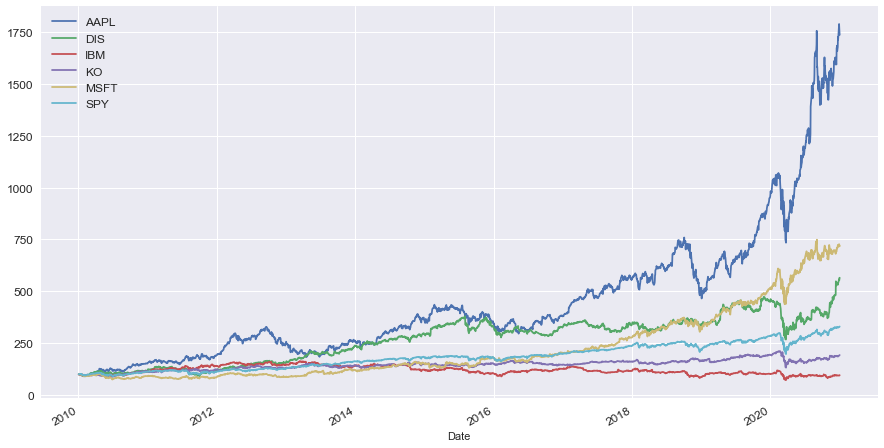

In [232]:
# Plot graphs with normclose again
normclose.plot(figsize = (15, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [233]:
# Remove N/A values of stocks in the ticker with a calculation in % change and save it as a variable named "ret"
ret = close.pct_change().dropna()
ret

,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05,0.001729,-0.002495,-0.012080,-0.012097,0.000323,0.002647
2010-01-06,-0.015906,-0.005314,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07,-0.001849,0.000314,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08,0.006648,0.001571,0.010035,-0.018509,0.006897,0.003328
2010-01-11,-0.008821,-0.016311,-0.010470,0.020308,-0.012720,0.001397
...,...,...,...,...,...,...
2020-12-24,0.007712,0.001037,0.006376,0.006782,0.007827,0.003890
2020-12-28,0.035766,0.029529,0.001043,0.013473,0.009921,0.008591
2020-12-29,-0.013315,-0.008722,-0.008172,-0.000554,-0.003601,-0.001908


In [234]:
# Generate descriptive statistics
ret.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,2768.0,0.001191,0.017843,-0.128647,-0.007123,0.000903,0.010379,0.119808
DIS,2768.0,0.000749,0.015717,-0.129846,-0.006210,0.000629,0.007901,0.144123
IBM,2768.0,0.000082,0.014132,-0.128507,-0.006321,0.000287,0.006743,0.113010
KO,2768.0,0.000298,0.011088,-0.096725,-0.004698,0.000438,0.005706,0.064796
MSFT,2768.0,0.000841,0.016012,-0.147390,-0.006939,0.000654,0.008636,0.142169
SPY,2768.0,0.000491,0.010909,-0.109424,-0.003532,0.000637,0.005421,0.090603


In [235]:
# Show daily mean and standard deviation of each stock
summary = ret.describe().T.loc[:, ["mean", "std"]]
summary

,mean,std
AAPL,0.001191,0.017843
DIS,0.000749,0.015717
IBM,0.000082,0.014132
KO,0.000298,0.011088
MSFT,0.000841,0.016012
SPY,0.000491,0.010909


In [236]:
# Show annual mean and standard deviation of each stock
summary["mean"] = summary["mean"] * 252
summary["std"] = summary["std"] * 252
summary

,mean,std
AAPL,0.300134,4.496330
DIS,0.188696,3.960754
IBM,0.020648,3.561367
KO,0.075091,2.794059
MSFT,0.211915,4.035054
SPY,0.123754,2.748986


Text(0.5, 1.0, 'Risk/Return')

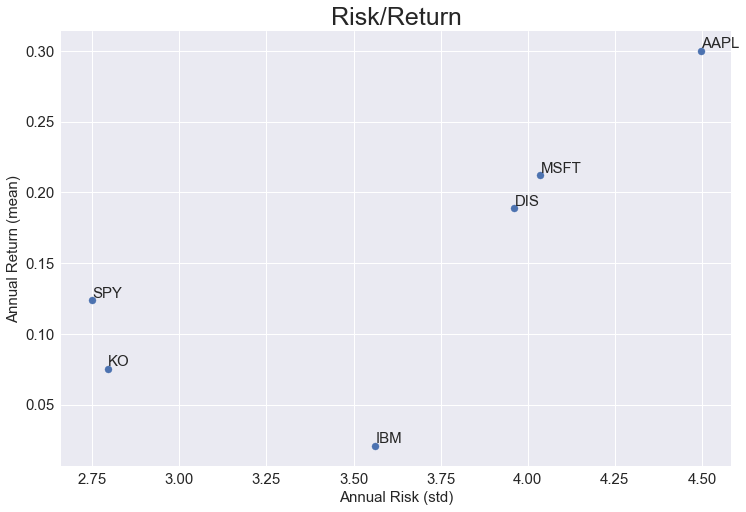

In [237]:
# Plot Risk and Return graph
summary.plot.scatter(x = "std", y = "mean", figsize = (12, 8), fontsize = 15, s = 50)
for i in summary.index:
    plt.annotate(i, xy = (summary.loc[i, "std"] + 0.002, summary.loc[i, "mean"] + 0.002), size = 15)
plt.xlabel("Annual Risk (std)", fontsize = 15)
plt.ylabel("Annual Return (mean)", fontsize = 15)
plt.title("Risk/Return", fontsize = 25)

### Correlation and Covariance

In [241]:
# Calculate ret's covariance
ret.cov()

,AAPL,DIS,IBM,KO,MSFT,SPY
AAPL,0.000318,0.000115,0.000110,0.000067,0.000158,0.000128
DIS,0.000115,0.000247,0.000111,0.000085,0.000121,0.000121
IBM,0.000110,0.000111,0.000200,0.000079,0.000121,0.000108
KO,0.000067,0.000085,0.000079,0.000123,0.000076,0.000077
MSFT,0.000158,0.000121,0.000121,0.000076,0.000256,0.000130
SPY,0.000128,0.000121,0.000108,0.000077,0.000130,0.000119


In [240]:
# Calculate ret's correlation
ret.corr()

,AAPL,DIS,IBM,KO,MSFT,SPY
AAPL,1.000000,0.408513,0.436100,0.339213,0.554051,0.659557
DIS,0.408513,1.000000,0.497775,0.486514,0.480457,0.706726
IBM,0.436100,0.497775,1.000000,0.502436,0.533130,0.703342
KO,0.339213,0.486514,0.502436,1.000000,0.429749,0.639324
MSFT,0.554051,0.480457,0.533130,0.429749,1.000000,0.744601
SPY,0.659557,0.706726,0.703342,0.639324,0.744601,1.000000


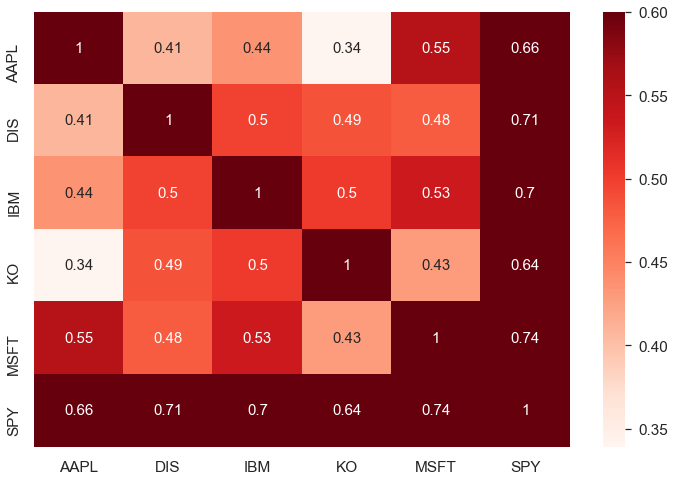

In [246]:
# Generate a Correlation Heatmap with Seaborn
import seaborn as sns
plt.figure(figsize = (12, 8))
sns.set(font_scale = 1.4)
sns.heatmap(ret.corr(), cmap = "Reds",  annot = True, annot_kws = {"size": 15}, vmax = 0.6)
plt.show()

### Simple Returns and Log Returns

In [247]:
# Generate a dataframe with columns and values
df = pd.DataFrame(index = [2016, 2017, 2018], data = [100, 50, 95], columns = ["Price"])
df

,Price
2016,100
2017,50
2018,95


In [248]:
# Calculate the % change and drop the N/A values
simplereturns = df.pct_change().dropna()
simplereturns

,Price
2017,-0.5
2018,0.9


In [249]:
# Calculate its mean
simplereturns.mean()

Price    0.2
dtype: float64

In [256]:
# Mean Returns are misleading 144.0 != 95 in 2018
100 * 1.2 * 1.2

144.0

In [252]:
# Implement log returns
logreturns = np.log(df/df.shift(1)).dropna()
logreturns

,Price
2017,-0.693147
2018,0.641854


In [253]:
# Calculate log returns mean
logreturns.mean()

Price   -0.025647
dtype: float64

In [257]:
# Calculate true mean returns
100 * np.exp(logreturns.mean() * 2)

Price    95.0
dtype: float64

In [259]:
# Download S&P 500 data from yfinance
SPY = yf.download("SPY")
SPY

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.763729,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.939873,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.992706,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.256910,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.362576,531500
...,...,...,...,...,...,...
2024-05-03,511.160004,512.549988,508.559998,511.290009,511.290009,72756700
2024-05-06,513.750000,516.609985,513.299988,516.570007,516.570007,47264700
2024-05-07,517.559998,518.570007,516.450012,517.140015,517.140015,52561300


In [261]:
# Convert Series to DataFrame
spy = SPY.Close.to_frame()
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2024-05-03,511.290009
2024-05-06,516.570007
2024-05-07,517.140015


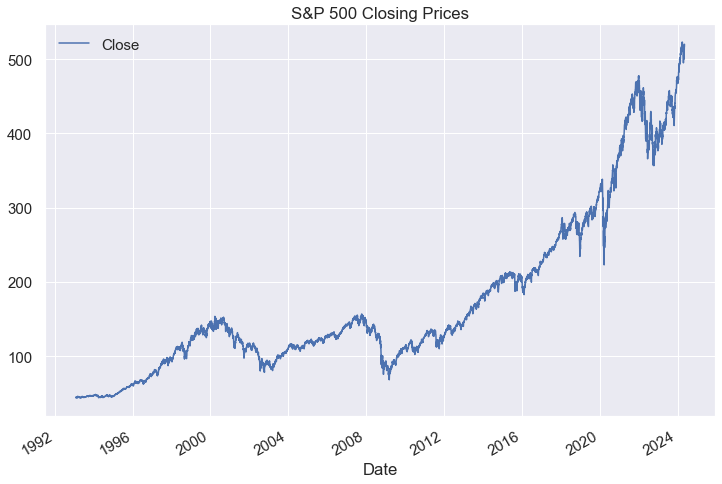

In [264]:
# Plot the S&P 500 Closing Prices graph
spy.plot(figsize = (12, 8), fontsize = 15)
plt.legend(loc="upper left", fontsize = 15)
plt.title("S&P 500 Closing Prices")
plt.show()

In [266]:
# Provide rolling window calculations = 10
spy_roll = spy.rolling(window = 10)
spy_roll

Rolling [window=10,center=False,axis=0,method=single]

In [267]:
# Calculate rolling mean
spy_roll = spy_roll.mean()
spy_roll

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2024-05-03,505.124002
2024-05-06,506.809003
2024-05-07,507.958005


In [269]:
# Calculate rolling median
spy_roll = spy.rolling(window = 10).median()

In [281]:
# Calculate rolling max
spy.rolling(window = 10, min_periods = 5).max()

,Close,SMA50
Date,,
1993-01-29,NaN,NaN
1993-02-01,NaN,NaN
1993-02-02,NaN,NaN
1993-02-03,NaN,NaN
1993-02-04,45.000000,NaN
...,...,...
2024-05-03,511.290009,511.543599
2024-05-06,516.570007,511.717999
2024-05-07,517.140015,511.940999


### Moving Average

In [282]:
# Add a "SMA50" column with rolling windows, minimun periods and mean
spy["SMA50"] = spy.rolling(window = 50, min_periods = 50).mean()

ValueError: Columns must be same length as key

In [283]:
# Show SMA50
spy

,Close,SMA50
Date,,
1993-01-29,43.937500,NaN
1993-02-01,44.250000,NaN
1993-02-02,44.343750,NaN
1993-02-03,44.812500,NaN
1993-02-04,45.000000,NaN
...,...,...
2024-05-03,511.290009,511.543599
2024-05-06,516.570007,511.717999
2024-05-07,517.140015,511.940999


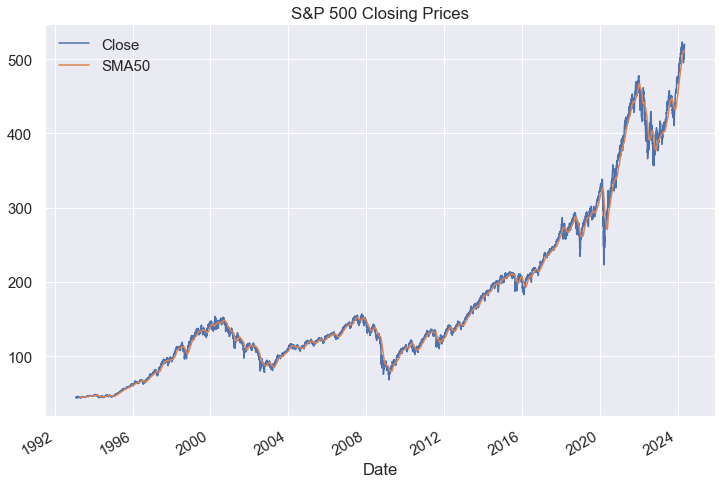

In [284]:
# Plot SMA50 graph
spy.plot(figsize = (12, 8), fontsize = 15)
plt.legend(loc="upper left", fontsize = 15)
plt.title("S&P 500 Closing Prices")
plt.show()

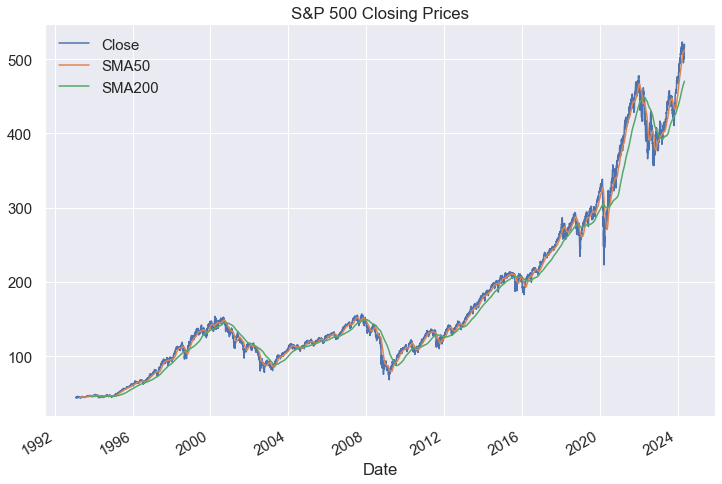

In [290]:
# Plot SMA200 graph
spy["SMA200"] = spy.Close.rolling(window = 200, min_periods = 200).mean()
spy.plot(figsize = (12, 8), fontsize = 15)
plt.legend(loc="upper left", fontsize = 15)
plt.title("S&P 500 Closing Prices")
plt.show()

In [291]:
# Add a "EMA100" column with exponentially weighted (EW) calculations, span, minimun periods and mean
spy["EMA100"] = spy.Close.ewm(span = 100, min_periods = 100).mean()

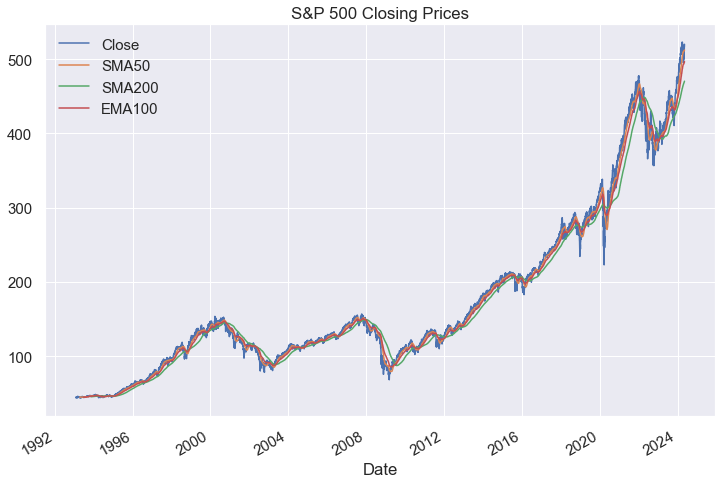

In [292]:
# Plot graph with legends on upper left
spy.plot(figsize = (12, 8), fontsize = 15)
plt.legend(loc="upper left", fontsize = 15)
plt.title("S&P 500 Closing Prices")
plt.show()

In [317]:
spy["Day"] = spy.index.day_name()

In [318]:
spy["Quarter"] = spy.index.quarter

In [335]:
SPY = yf.download("SPY")
spy

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2010-12-31,125.529999,125.870003,125.330002,125.750000,98.271172,91218900.0
2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,126.709999,127.599998,125.699997,127.050003,99.287125,138725200.0
2011-01-04,127.330002,127.370003,126.190002,126.980003,99.232399,137409700.0
...,...,...,...,...,...,...
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30,322.950012,323.100006,320.549988,321.079987,300.565643,49729100.0
2019-12-31,320.529999,322.130005,320.149994,321.859985,301.295837,57077300.0


In [338]:
all_days = pd.date_range(start = "2010-12-31", end = "2020-01-01", freq = "D")
all_days

DatetimeIndex(['2010-12-31', '2011-01-01', '2011-01-02', '2011-01-03',
               '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=3289, freq='D')

In [339]:
spy = spy.reindex(all_days)
spy

,Open,High,Low,Close,Adj Close,Volume
2010-12-31,125.529999,125.870003,125.330002,125.750000,98.271172,91218900.0
2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,126.709999,127.599998,125.699997,127.050003,99.287125,138725200.0
2011-01-04,127.330002,127.370003,126.190002,126.980003,99.232399,137409700.0
...,...,...,...,...,...,...
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30,322.950012,323.100006,320.549988,321.079987,300.565643,49729100.0
2019-12-31,320.529999,322.130005,320.149994,321.859985,301.295837,57077300.0


In [340]:
# Replace the missing values by the value from the previous date
spy.fillna(method = "ffill")

,Open,High,Low,Close,Adj Close,Volume
2010-12-31,125.529999,125.870003,125.330002,125.750000,98.271172,91218900.0
2011-01-01,125.529999,125.870003,125.330002,125.750000,98.271172,91218900.0
2011-01-02,125.529999,125.870003,125.330002,125.750000,98.271172,91218900.0
2011-01-03,126.709999,127.599998,125.699997,127.050003,99.287125,138725200.0
2011-01-04,127.330002,127.370003,126.190002,126.980003,99.232399,137409700.0
...,...,...,...,...,...,...
2019-12-28,323.739990,323.799988,322.279999,322.859985,302.231964,42528800.0
2019-12-29,323.739990,323.799988,322.279999,322.859985,302.231964,42528800.0
2019-12-30,322.950012,323.100006,320.549988,321.079987,300.565643,49729100.0
2019-12-31,320.529999,322.130005,320.149994,321.859985,301.295837,57077300.0


In [342]:
SPY = yf.download("SPY", interval = "1wk")
SPY

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-25,43.968750,43.968750,43.750000,43.937500,24.763735,1003200
1993-02-01,43.968750,45.093750,43.968750,44.968750,25.344978,2234800
1993-02-08,44.968750,45.125000,44.531250,44.593750,25.133606,1159800
1993-02-15,44.468750,44.468750,42.812500,43.562500,24.552383,998700
1993-02-22,43.687500,44.437500,43.468750,44.406250,25.027937,1024300
...,...,...,...,...,...,...
2024-04-08,519.150024,520.750000,509.079987,510.850006,510.850006,361747100
2024-04-15,515.130005,515.299988,493.859985,495.160004,495.160004,418172900
2024-04-22,497.829987,509.880005,495.429993,508.260010,508.260010,321951200


## Cummaltive Returns, Drawdowns etc.,

In [380]:
# Download Apple stock data from finance and convert them into a DataFrame
apple = yf.download("AAPL")
apple = apple.Close.to_frame()
apple

[*********************100%***********************]  1 of 1 completed


,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2024-05-03,183.380005
2024-05-06,181.710007
2024-05-07,182.399994


In [381]:
# Add a column "d_returns"
apple["d_returns"] = np.log(apple.div(apple.shift(1)))
apple

,Close,d_returns
Date,,
1980-12-12,0.128348,NaN
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
...,...,...
2024-05-03,183.380005,0.058096
2024-05-06,181.710007,-0.009148
2024-05-07,182.399994,0.003790


In [382]:
# Drop N/A values
apple.dropna(inplace = True)
apple

,Close,d_returns
Date,,
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
1980-12-19,0.126116,0.059239
...,...,...
2024-05-03,183.380005,0.058096
2024-05-06,181.710007,-0.009148
2024-05-07,182.399994,0.003790


In [383]:
# Sum up all the daily returns
apple.d_returns.sum()

7.27103884452157

In [384]:
# Calculate the exponential by summing up the daily returns
np.exp(apple.d_returns.sum())

1438.0435810343363

In [385]:
# Calculate Cummulative Returns
apple["cummreturns"] = apple.d_returns.cumsum().apply(np.exp)
apple

,Close,d_returns,cummreturns
Date,,,
1980-12-15,0.121652,-0.053581,0.947829
1980-12-16,0.112723,-0.076231,0.878261
1980-12-17,0.115513,0.024450,0.899998
1980-12-18,0.118862,0.028580,0.926092
1980-12-19,0.126116,0.059239,0.982610
...,...,...,...
2024-05-03,183.380005,0.058096,1428.771894
2024-05-06,181.710007,-0.009148,1415.760407
2024-05-07,182.399994,0.003790,1421.136317


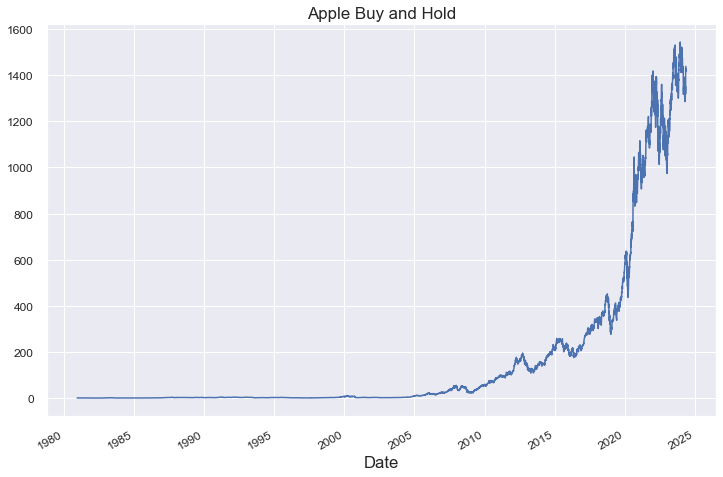

In [386]:
# Plot Apple Buy and Hold graph
apple.cummreturns.plot(figsize = (12, 8), title = "Apple Buy and Hold", fontsize = 12)
plt.show()

In [387]:
# Expected daily Apple Stock return
apple.d_returns.mean() * 252

0.16745583886121693

In [388]:
# Expected daily Apple Stock standard deviation
apple.d_returns.std()* np.sqrt(252)

0.45020804847132784

In [389]:
# Calculate Culmalative Maximum Returns
apple["cummmax"] = apple.cummreturns.cummax()
apple

,Close,d_returns,cummreturns,cummmax
Date,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829
1980-12-16,0.112723,-0.076231,0.878261,0.947829
1980-12-17,0.115513,0.024450,0.899998,0.947829
1980-12-18,0.118862,0.028580,0.926092,0.947829
1980-12-19,0.126116,0.059239,0.982610,0.982610
...,...,...,...,...
2024-05-03,183.380005,0.058096,1428.771894,1543.537972
2024-05-06,181.710007,-0.009148,1415.760407,1543.537972
2024-05-07,182.399994,0.003790,1421.136317,1543.537972


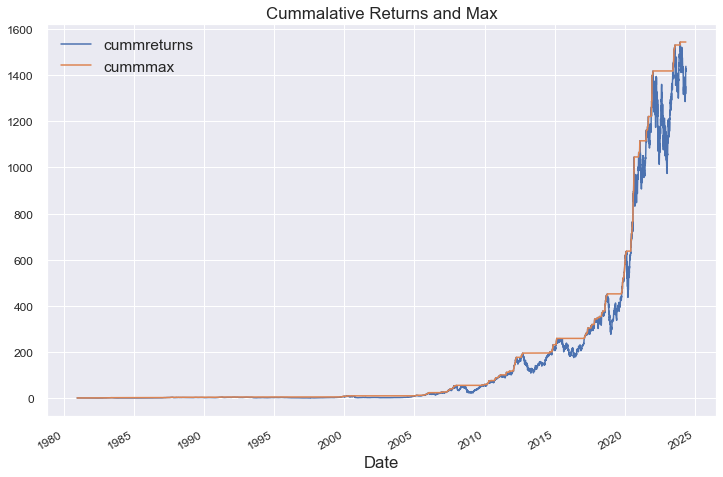

In [390]:
# Plot the Cummulative Returns and Max graph
apple[["cummreturns", "cummmax"]].plot(figsize = (12, 8), title = "Cummalative Returns and Max", fontsize = 12)
plt.show()

In [391]:
# Calculate drawdown
apple["drawdown"] = apple["cummmax"] - apple["cummreturns"]
apple

,Close,d_returns,cummreturns,cummmax,drawdown
Date,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000
...,...,...,...,...,...
2024-05-03,183.380005,0.058096,1428.771894,1543.537972,114.766078
2024-05-06,181.710007,-0.009148,1415.760407,1543.537972,127.777564
2024-05-07,182.399994,0.003790,1421.136317,1543.537972,122.401655


In [392]:
# Find out the maximum drawdown
apple.drawdown.max()

444.02718404402026

In [393]:
# Find out which date has the maximum drawdown
apple.drawdown.idxmax()

Timestamp('2023-01-05 00:00:00')

In [394]:
# Find the data from a specific index
apple.loc[(apple.index == '2023-01-05 00:00:00')]

,Close,d_returns,cummreturns,cummmax,drawdown
Date,,,,,
2023-01-05,125.019997,-0.010661,974.070524,1418.097708,444.027184


In [395]:
# Calculate and show the drawdown %
apple["drawdown%"] = (apple["cummmax"] - apple["cummreturns"]) / apple["cummmax"]
apple

,Close,d_returns,cummreturns,cummmax,drawdown,drawdown%
Date,,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569,0.073398
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831,0.050464
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738,0.022934
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000,0.000000
...,...,...,...,...,...,...
2024-05-03,183.380005,0.058096,1428.771894,1543.537972,114.766078,0.074353
2024-05-06,181.710007,-0.009148,1415.760407,1543.537972,127.777564,0.082782
2024-05-07,182.399994,0.003790,1421.136317,1543.537972,122.401655,0.079299


In [396]:
# Find out maximum downdown %
apple["drawdown%"].max()

0.82216567924191

In [397]:
# Find out its index
apple["drawdown%"].idxmax()

Timestamp('1997-12-23 00:00:00')

In [398]:
# Check out the number with a specific index
apple.loc[(apple.index == '1997-12-23 00:00:00')]

,Close,d_returns,cummreturns,cummmax,drawdown,drawdown%
Date,,,,,,
1997-12-23,0.115513,-0.02858,0.899998,5.060882,4.160883,0.822166


## SMA Strategy

In [403]:
# Collect data from a specific index query
data = apple.Close.loc[(apple.index >= '1997-12-23 00:00:00')]
data

Date
1997-12-23      0.115513
1997-12-24      0.117188
1997-12-26      0.118862
1997-12-29      0.117188
1997-12-30      0.117746
                 ...    
2024-05-03    183.380005
2024-05-06    181.710007
2024-05-07    182.399994
2024-05-08    182.740005
2024-05-09    184.570007
Name: Close, Length: 6637, dtype: float64

In [409]:
# Convert data into a DataFrame
data = data.to_frame()
data

,Close
Date,
1997-12-23,0.115513
1997-12-24,0.117188
1997-12-26,0.118862
1997-12-29,0.117188
1997-12-30,0.117746
...,...
2024-05-03,183.380005
2024-05-06,181.710007
2024-05-07,182.399994


In [410]:
sma_s = 50
sma_l = 100

In [411]:
# Add "sma_s" and "sma_l"
data["sma_s"] = data.Close.rolling(sma_s).mean()
data["sma_l"] = data.Close.rolling(sma_l).mean()
data

,Close,sma_s,sma_l
Date,,,
1997-12-23,0.115513,NaN,NaN
1997-12-24,0.117188,NaN,NaN
1997-12-26,0.118862,NaN,NaN
1997-12-29,0.117188,NaN,NaN
1997-12-30,0.117746,NaN,NaN
...,...,...,...
2024-05-03,183.380005,172.3884,180.7844
2024-05-06,181.710007,172.3722,180.6697
2024-05-07,182.399994,172.3970,180.5466


<AxesSubplot:title={'center':'APPLE - SMA50 | SMA100'}, xlabel='Date'>

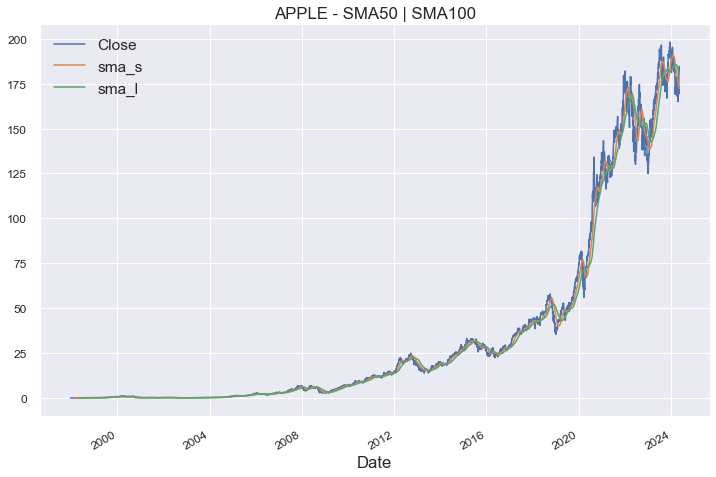

In [414]:
# Plot APPLE - SMA50 | SMA100
data.plot(figsize = (12, 8),  title = "APPLE - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)

<AxesSubplot:title={'center':'APPLE - SMA50 | SMA100'}, xlabel='Date'>

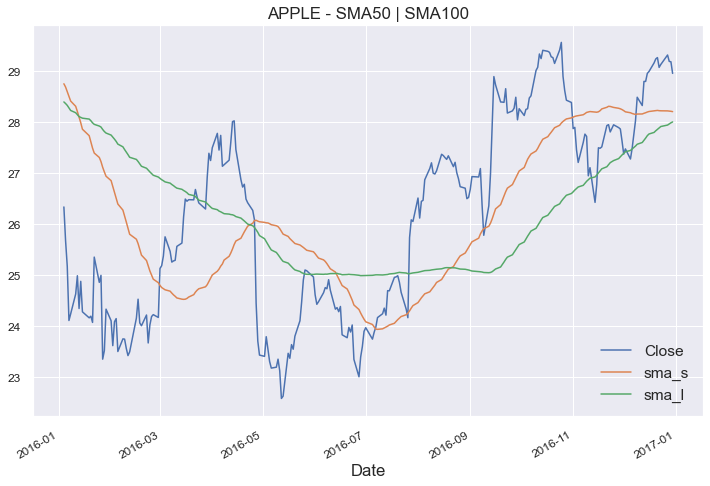

In [415]:
# Plot APPLE - SMA50 | SMA100 by Specifying a particular year
data.loc["2016"].plot(figsize = (12, 8),  title = "APPLE - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)

In [417]:
# Drop N/A values
data.dropna(inplace = True)
data

,Close,sma_s,sma_l
Date,,,
1998-05-18,0.254464,0.246250,0.207905
1998-05-19,0.262277,0.247433,0.209372
1998-05-20,0.263951,0.248415,0.210840
1998-05-21,0.257813,0.248906,0.212229
1998-05-22,0.248884,0.249063,0.213546
...,...,...,...
2024-05-03,183.380005,172.388400,180.784400
2024-05-06,181.710007,172.372200,180.669700
2024-05-07,182.399994,172.397000,180.546600


In [418]:
# Position Long = 1, Position Short = -1
data["position"] = np.where(data["sma_s"] > data["sma_l"], 1, -1)
data

,Close,sma_s,sma_l,position
Date,,,,
1998-05-18,0.254464,0.246250,0.207905,1
1998-05-19,0.262277,0.247433,0.209372,1
1998-05-20,0.263951,0.248415,0.210840,1
1998-05-21,0.257813,0.248906,0.212229,1
1998-05-22,0.248884,0.249063,0.213546,1
...,...,...,...,...
2024-05-03,183.380005,172.388400,180.784400,-1
2024-05-06,181.710007,172.372200,180.669700,-1
2024-05-07,182.399994,172.397000,180.546600,-1


<AxesSubplot:title={'center':'APPLE - SMA50 | SMA100'}, xlabel='Date'>

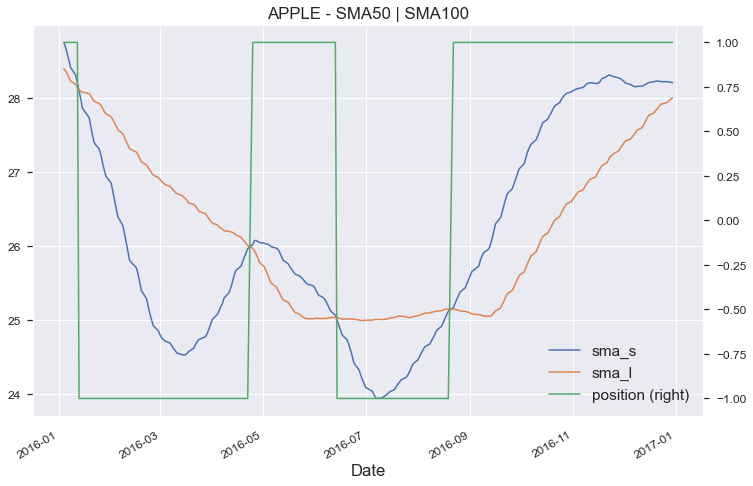

In [421]:
# Short and long position in 2016 represented in graph
data.loc["2016", ["sma_s", "sma_l", "position"]].plot(figsize = (12, 8),  title = "APPLE - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12, secondary_y = "position")

<AxesSubplot:title={'center':'APPLE - SMA50 | SMA100'}, xlabel='Date'>

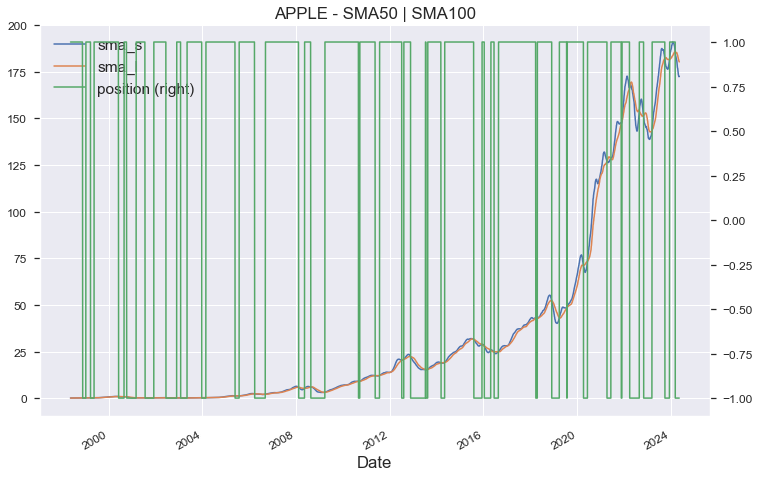

In [422]:
# Plot Overall Short (lines going down) and Long Positions (lines going up)
data.loc[:, ["sma_s", "sma_l", "position"]].plot(figsize = (12, 8),  title = "APPLE - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12, secondary_y = "position")

In [423]:
# Add a column "returnsb&h by taking a log value
data["returnsb&h"] = np.log(data.Close.div(data.Close.shift(1)))
data

,Close,sma_s,sma_l,position,returnsb&h
Date,,,,,
1998-05-18,0.254464,0.246250,0.207905,1,NaN
1998-05-19,0.262277,0.247433,0.209372,1,0.030242
1998-05-20,0.263951,0.248415,0.210840,1,0.006362
1998-05-21,0.257813,0.248906,0.212229,1,-0.023529
1998-05-22,0.248884,0.249063,0.213546,1,-0.035248
...,...,...,...,...,...
2024-05-03,183.380005,172.388400,180.784400,-1,0.058096
2024-05-06,181.710007,172.372200,180.669700,-1,-0.009148
2024-05-07,182.399994,172.397000,180.546600,-1,0.003790


In [425]:
# Add a column "strategy" as Buy and Hold Strategy
data["strategy"] = data["returnsb&h"] * data.position.shift(1)
data

,Close,sma_s,sma_l,position,returnsb&h,strategy
Date,,,,,,
1998-05-18,0.254464,0.246250,0.207905,1,NaN,NaN
1998-05-19,0.262277,0.247433,0.209372,1,0.030242,0.030242
1998-05-20,0.263951,0.248415,0.210840,1,0.006362,0.006362
1998-05-21,0.257813,0.248906,0.212229,1,-0.023529,-0.023529
1998-05-22,0.248884,0.249063,0.213546,1,-0.035248,-0.035248
...,...,...,...,...,...,...
2024-05-03,183.380005,172.388400,180.784400,-1,0.058096,-0.058096
2024-05-06,181.710007,172.372200,180.669700,-1,-0.009148,0.009148
2024-05-07,182.399994,172.397000,180.546600,-1,0.003790,-0.003790


In [426]:
# Drop N/A values
data.dropna(inplace = True)

In [427]:
# returnsb&h > strategy as it beats the strategy, but need to consider other stats like standard deviation
data[["returnsb&h", "strategy"]].sum()

returnsb&h    6.586625
strategy      2.241421
dtype: float64

In [428]:
# What $1 invested in the past will be the future value
data[["returnsb&h", "strategy"]].sum().apply(np.exp) 

returnsb&h    725.328561
strategy        9.406688
dtype: float64

In [430]:
# Multiply the standard deviation of both "returnsb&h" and "strategy" with the square root of 252 transactional days (a whole year)
data[["returnsb&h", "strategy"]].std() * np.sqrt(252)

returnsb&h    0.418535
strategy      0.418805
dtype: float64

<AxesSubplot:xlabel='Date'>

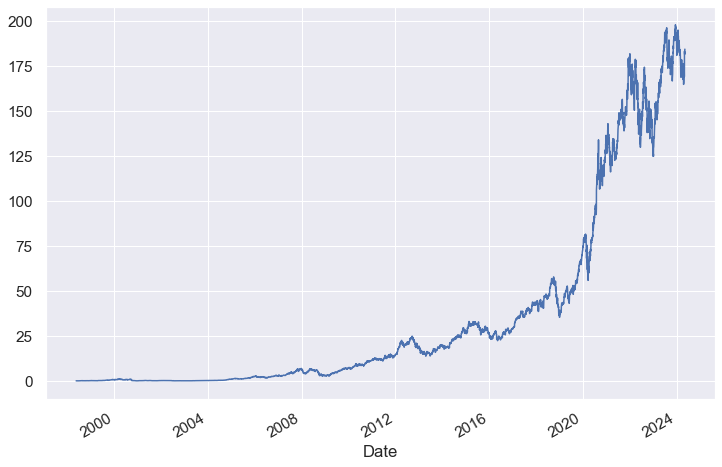

In [431]:
# Plot a graph about Closing prices
data.Close.plot(figsize = (12, 8))

## Strategy Adjusted with Long biased
## by creating a strategy without short

In [432]:
# Build Buy Strategy
data["position2"] = np.where(data["sma_s"] > data["sma_l"], 1, 0)
data["strategy2"] = data["returnsb&h"] * data.position2.shift(1)

In [433]:
data

,Close,sma_s,sma_l,position,returnsb&h,strategy,position2,strategy2
Date,,,,,,,,
1998-05-19,0.262277,0.247433,0.209372,1,0.030242,0.030242,1,NaN
1998-05-20,0.263951,0.248415,0.210840,1,0.006362,0.006362,1,0.006362
1998-05-21,0.257813,0.248906,0.212229,1,-0.023529,-0.023529,1,-0.023529
1998-05-22,0.248884,0.249063,0.213546,1,-0.035248,-0.035248,1,-0.035248
1998-05-26,0.238281,0.248984,0.214752,1,-0.043536,-0.043536,1,-0.043536
...,...,...,...,...,...,...,...,...
2024-05-03,183.380005,172.388400,180.784400,-1,0.058096,-0.058096,0,0.000000
2024-05-06,181.710007,172.372200,180.669700,-1,-0.009148,0.009148,0,-0.000000
2024-05-07,182.399994,172.397000,180.546600,-1,0.003790,-0.003790,0,0.000000


In [434]:
data.dropna(inplace = True)
data

,Close,sma_s,sma_l,position,returnsb&h,strategy,position2,strategy2
Date,,,,,,,,
1998-05-20,0.263951,0.248415,0.210840,1,0.006362,0.006362,1,0.006362
1998-05-21,0.257813,0.248906,0.212229,1,-0.023529,-0.023529,1,-0.023529
1998-05-22,0.248884,0.249063,0.213546,1,-0.035248,-0.035248,1,-0.035248
1998-05-26,0.238281,0.248984,0.214752,1,-0.043536,-0.043536,1,-0.043536
1998-05-27,0.238839,0.248996,0.215968,1,0.002339,0.002339,1,0.002339
...,...,...,...,...,...,...,...,...
2024-05-03,183.380005,172.388400,180.784400,-1,0.058096,-0.058096,0,0.000000
2024-05-06,181.710007,172.372200,180.669700,-1,-0.009148,0.009148,0,-0.000000
2024-05-07,182.399994,172.397000,180.546600,-1,0.003790,-0.003790,0,0.000000


In [435]:
data[["returnsb&h", "strategy2"]].sum()

returnsb&h    6.556383
strategy2     4.383781
dtype: float64

In [436]:
# What $1 invested in the past will be the future value
data[["returnsb&h", "strategy2"]].sum().apply(np.exp) 

returnsb&h    703.721647
strategy2      80.140472
dtype: float64

In [438]:
data[["returnsb&h", "strategy2"]].std() * np.sqrt(252)

returnsb&h    0.418528
strategy2     0.345123
dtype: float64

In [439]:
## Strategy 2 is better than Strategy 1 (Strategy)
data[["strategy", "strategy2"]].std() * np.sqrt(252)

strategy     0.418796
strategy2    0.345123
dtype: float64

# Creating our first function

In [496]:
def test_strategy(stock, start, end, SMA):
    df = yf.download(stock, start = start, end = end)
    data = df.Close.to_frame()
    data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
    data["SMA_S"] = data.Close.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] < data["SMA_L"], 1, -1)
    data["strategy"] = data["returns"] * data.position.shift(1)
    data.dropna(inplace = True)
    ret = np.exp(data["strategy"].sum())
    std = data["strategy"].std() * np.sqrt(252)
    
    return ret, std

In [497]:
# The future value of $1 invested in MSFT since 2000-01-01 becomes $2.55 with a 29% standard deviation in price
test_strategy("MSFT", "2000-01-01", "2020-01-01", (50, 200))

[*********************100%***********************]  1 of 1 completed


(2.5576785326282434, 0.2906766831415824)

In [498]:
test_strategy("AAPL", "2000-01-01", "2020-01-01", (50, 200))

[*********************100%***********************]  1 of 1 completed


(0.060458319773626056, 0.3669968290380402)

In [499]:
test_strategy("SPY", "2000-01-01", "2020-01-01", (50, 200))

[*********************100%***********************]  1 of 1 completed


(0.20980320108146044, 0.1878794718595858)

## Creating our first class

In [518]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        df = yf.download(self.symbol, start = self.start, end = self.end)
        data = df.Close.to_frame()
        data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
        data["SMA_S"] = data.Close.rolling(self.SMA_S).mean()
        data["SMA_L"] = data.Close.rolling(self.SMA_L).mean()
        data.dropna(inplace = True)
        self.data2 = data
        
        return data
    
    def test_results(self):
        data = self.data2.copy().dropna()
        data["position"] = np.where(data["SMA_S"] < data["SMA_L"], 1, -1)
        data["strategy"] = data["returns"] * data.position.shift(1)
        data.dropna(inplace = True)
        data["returnsbh"] = data["returns"].cumsum().apply(np.exp)
        data["returnsstrategy"] = data["strategy"].cumsum().apply(np.exp)
        perf = data["returnsstrategy"].iloc[-1]
        outperf = perf - data["returnsbh"].iloc[-1]
        self.results = data       
                                  
        ret = np.exp(data["strategy"].sum())
        std = data["strategy"].std() * np.sqrt(252)
        
        #return ret, std
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("Run the test please.")
        else:
            title = "{}| SMA_S = {} | SMA_L{}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["returnsbh", "returnsstrategy"]].plot(title = title, figsize = (12, 8))

In [519]:
tester = SMABacktester("SPY", 50, 100, "2000-01-01", "2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [520]:
tester.test_results()

(0.385694, -1.909207)

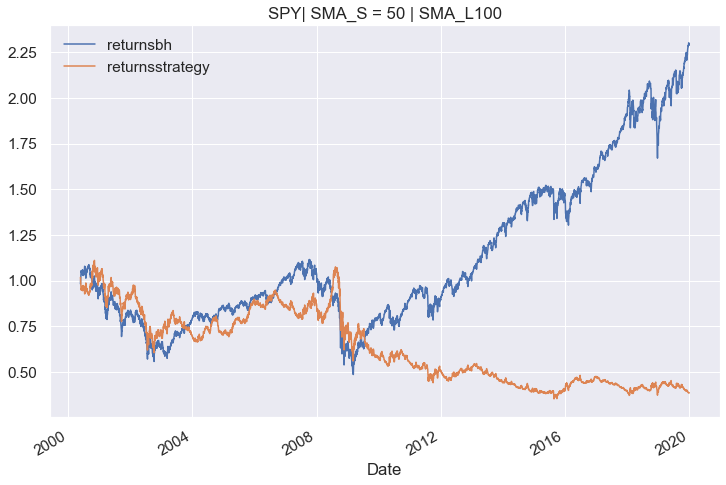

In [521]:
tester.plot_results()

### Copy the whole class with necessary libraries to a file named SMAbacktest
### Save it as a python file by clicking on "File" => "Download as Python(.py)"
### Create another new file called SMAclasscheck and then run the class within SMAbacktest
### Last but not least, watch Stan Weinstein's Strategy in the QuantProgram YouTube channel to backtest it again

# Working with API with Alpha Vantage

In [ ]:
# After getting the API key, go to Anaconda Navigator base(root) to pip install alpha_vantage 

In [522]:
from alpha_vantage.timeseries import TimeSeries

In [523]:
# Put my(your) API key
API_key = "C4MGSCFZNPG1ED9T"

In [524]:
ts = TimeSeries(key = API_key, output_format = "pandas")

In [525]:
data = ts.get_daily("AAPL")

In [526]:
data

(            1. open   2. high  3. low  4. close    5. volume
 date                                                        
 2024-05-09  182.560  184.6600  182.11    184.57   48982972.0
 2024-05-08  182.850  183.0700  181.45    182.74   45057087.0
 2024-05-07  183.450  184.9000  181.32    182.40   77305771.0
 2024-05-06  182.354  184.2000  180.42    181.71   78569667.0
 2024-05-03  186.645  187.0000  182.66    183.38  163224109.0
 ...             ...       ...     ...       ...          ...
 2023-12-21  196.100  197.0800  193.50    194.68   46482549.0
 2023-12-20  196.900  197.6800  194.83    194.83   52242815.0
 2023-12-19  196.160  196.9500  195.89    196.94   40233138.0
 2023-12-18  196.090  196.6300  194.39    195.89   55751861.0
 2023-12-15  197.530  198.3999  197.00    197.57  128538401.0
 
 [100 rows x 5 columns],
 {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AAPL',
  '3. Last Refreshed': '2024-05-09',
  '4. Output Size': 'Compact',
  '

In [527]:
data[0]

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-05-09,182.560,184.6600,182.11,184.57,48982972.0
2024-05-08,182.850,183.0700,181.45,182.74,45057087.0
2024-05-07,183.450,184.9000,181.32,182.40,77305771.0
2024-05-06,182.354,184.2000,180.42,181.71,78569667.0
2024-05-03,186.645,187.0000,182.66,183.38,163224109.0
...,...,...,...,...,...
2023-12-21,196.100,197.0800,193.50,194.68,46482549.0
2023-12-20,196.900,197.6800,194.83,194.83,52242815.0
2023-12-19,196.160,196.9500,195.89,196.94,40233138.0


In [528]:
data2 = data[0]

In [529]:
data2.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [531]:
data2["4. close"].to_frame()

,4. close
date,
2024-05-09,184.57
2024-05-08,182.74
2024-05-07,182.40
2024-05-06,181.71
2024-05-03,183.38
...,...
2023-12-21,194.68
2023-12-20,194.83
2023-12-19,196.94
